In [2]:
import matplotlib.pyplot as plt
import numpy as np

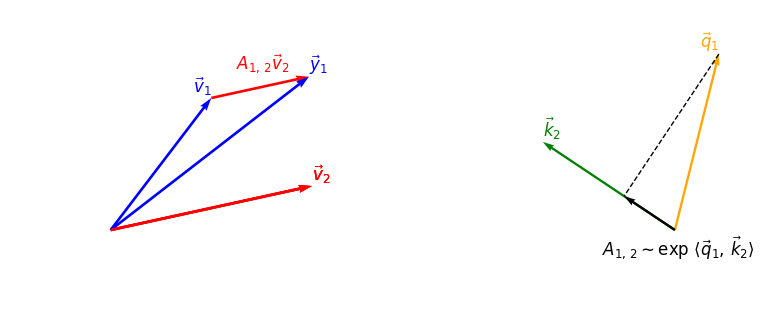

In [79]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

col_v1 = "blue"
col_v2 = "red"
col_y1 = "blue"
col_q1 = "orange"
col_k2 = "green"
col_proj = "black"
col_sum = col_v2

v1 = np.array([2, 3])
v2 = np.array([4, 1])
ax = axs[0]
ax.set_xlim(-2, 5)
ax.set_ylim(-2, 5)
# Before the sum (frame 1)
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color=col_v1)
ax.text(v1[0], v1[1], r'$\vec{v}_1$', color=col_v1, fontsize=12, ha='right', va='bottom')

ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color=col_v2)
ax.text(v2[0], v2[1], r'$\vec{v}_2$', color=col_v2, fontsize=12, ha='left', va='bottom')
# Sum (frame 2)
v2_norm= np.sqrt(np.dot(v2, v2))
vec_sum = (2 / v2_norm) * v2
ax.quiver(v1[0], v1[1], vec_sum[0], vec_sum[1], color=col_sum, scale=1, scale_units='xy', angles='xy', linestyle='dashed')
ax.text(v1[0]+0.5, v1[1]+0.5, r'$A_{1,\,2}\vec{v}_2$', color=col_sum, fontsize=12, ha='left', va='bottom')

ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color=col_v2)
ax.text(v2[0], v2[1], r'$\vec{v}_2$', color=col_v2, fontsize=12, ha='left', va='bottom')
# After the sum (frame 3)
ax.quiver(0, 0, v1[0]+ vec_sum[0], v1[1] + vec_sum[1], color=col_y1, scale=1, scale_units='xy', angles='xy', linestyle='dashed')
ax.text(v1[0]+ vec_sum[0], v1[1] + vec_sum[1], r'$\vec{y}_1$', color=col_y1, fontsize=12, ha='left', va='bottom')

ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color=col_v2)
ax.text(v2[0], v2[1], r'$\vec{v}_2$', color=col_v2, fontsize=12, ha='left', va='bottom')


ax.axis("off")



q1 = np.array([1, 4])
k2 = np.array([-3, 2])

dot_product = np.dot(q1, k2)
k2_norm_sq = np.dot(k2, k2)
vec_proj = (dot_product / k2_norm_sq) * k2
ax = axs[1]
ax.set_xlim(-5, 2)
ax.set_ylim(-2, 5)
ax.quiver(0, 0, q1[0], q1[1], angles='xy', scale_units='xy', scale=1, color=col_q1)
ax.text(q1[0], q1[1], r'$\vec{q}_1$', color=col_q1, fontsize=12, ha='right', va='bottom')
ax.quiver(0, 0, k2[0], k2[1], angles='xy', scale_units='xy', scale=1, color=col_k2)
ax.text(k2[0], k2[1], r'$\vec{k}_2$', color=col_k2, fontsize=12, ha='left', va='bottom')
# Plot projection vector
ax.quiver(0, 0, *vec_proj, color=col_proj, scale=1, scale_units='xy', angles='xy', linestyle='dotted')
ax.plot([q1[0], vec_proj[0]], [q1[1], vec_proj[1]], 'k--', linewidth=1)
ax.text(vec_proj[0]-0.5, vec_proj[1]-1.5, r'$A_{1,\,2} \sim \exp\,\langle \vec{q}_1,\, \vec{k}_2 \rangle$', color=col_proj, fontsize=12, ha='left', va='bottom')
ax.axis("off")
plt.gca().set_aspect('equal')
plt.show()

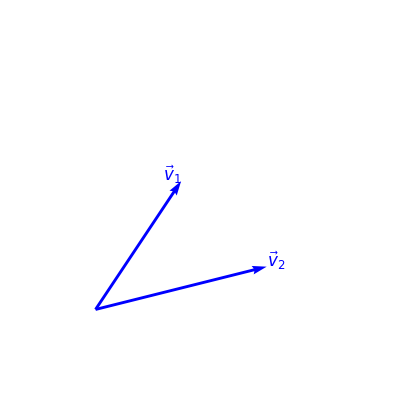

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Define colors and vectors
col_v1 = "blue"
col_v2 = "red"
col_y1 = "blue"
col_sum = col_v2

v1 = np.array([2, 3])
v2 = np.array([4, 1])

v2_norm = np.linalg.norm(v2)
proj = (2 / v2_norm) * v2
v_sum = v1 + proj

# Set up figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-2, 7)
ax.set_ylim(-2, 7)
ax.set_aspect('equal')
ax.axis('off')

# Placeholders for arrows and texts
arrows = []
texts = []

def update(frame):
    global arrows, texts
    # Remove previous arrows and texts
    for arrow in arrows:
        arrow.remove()
    for txt in texts:
        txt.remove()
    arrows = []
    texts = []

    if frame >= 0:
        a1 = ax.quiver(0, 0, *v1, color=col_v1, scale=1, scale_units='xy', angles='xy')
        t1 = ax.text(*v1, r'$\vec{v}_1$', color=col_v1, fontsize=12, ha='right')
        arrows.append(a1)
        texts.append(t1)
        a2 = ax.quiver(0, 0, *v2, color=col_v2, scale=1, scale_units='xy', angles='xy')
        t2 = ax.text(*v2, r'$\vec{v}_2$', color=col_v2, fontsize=12, ha='left')
        arrows.append(a2)
        texts.append(t2)

    if frame >= 1:
        a_proj = ax.quiver(*v1, *proj, color=col_proj, scale=1, scale_units='xy', angles='xy', linestyle='dashed')
        t_proj = ax.text(v1[0] + 0.5, v1[1] + 0.5, r'$A_{1,2}\vec{v}_2$', color=col_proj, fontsize=12, ha='left')
        arrows.append(a_proj)
        texts.append(t_proj)

    if frame >= 2:
        a_sum = ax.quiver(0, 0, *v_sum, color=col_y1, scale=1, scale_units='xy', angles='xy', linestyle='dashed')
        t_sum = ax.text(*v_sum, r'$\vec{y}_1$', color=col_y1, fontsize=12, ha='left')
        arrows.append(a_sum)
        texts.append(t_sum)

# Animate
anim = FuncAnimation(fig, update, frames=4, interval=1000)

# Show in Jupyter
from IPython.display import HTML
HTML(anim.to_jshtml())

# Optional: Save as GIF
# anim.save("vector_animation.gif", writer=PillowWriter(fps=1))

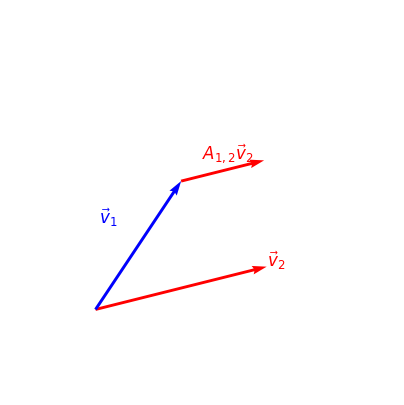

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define vectors and projection
v1 = np.array([2, 3])
v2 = np.array([4, 1])
col_v1 = "blue"
col_v2 = "red"
col_vsum = col_v2
v2_norm = np.linalg.norm(v2)
proj = (2 / v2_norm) * v2  # scalar projection scaled
y1 = v1 + proj

# Set up figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-2, 7)
ax.set_ylim(-2, 7)
ax.set_aspect('equal')
ax.axis('off')

# Static vectors v2, vsum
ax.quiver(0, 0, *v1, color="lightgrey", scale=1, scale_units='xy', angles='xy')
#ax.text(*v1, r'$\vec{v}_1$', color=col_v1, fontsize=12, ha='right')


ax.quiver(0, 0, *v2, color=col_v2, scale=1, scale_units='xy', angles='xy')
ax.text(*v2, r'$\vec{v}_2$', color=col_v2, fontsize=12, ha='left')

ax.quiver(*v1, *proj, color=col_vsum, scale=1, scale_units='xy', angles='xy', linestyle='dashed')
ax.text(v1[0] + 0.5, v1[1] + 0.5, r'$A_{1,2}\vec{v}_2$', color=col_vsum, fontsize=12, ha='left')



# Animated vector v1 -> y1
arrow = ax.quiver(0, 0, 0, 0, color=col_v1, scale=1, scale_units='xy', angles='xy')
label = ax.text(0, 0, "", fontsize=12, ha='right')

def update(frame):
    t = frame / 30  # 30 frames total, t ∈ [0,1]
    v = v1 + t * proj
    arrow.set_UVC(v[0], v[1])
    label.set_position(v-[1.5, 1])
    label.set_text(r'$\vec{v}_1$')
    label.set_color(col_v1)
    return arrow, label

# Animate
anim = FuncAnimation(fig, update, frames=31, interval=80)

# Show in Jupyter
HTML(anim.to_jshtml())

# Optional: Save animation
# anim.save("v1_to_y1.gif", writer='pillow', fps=30)

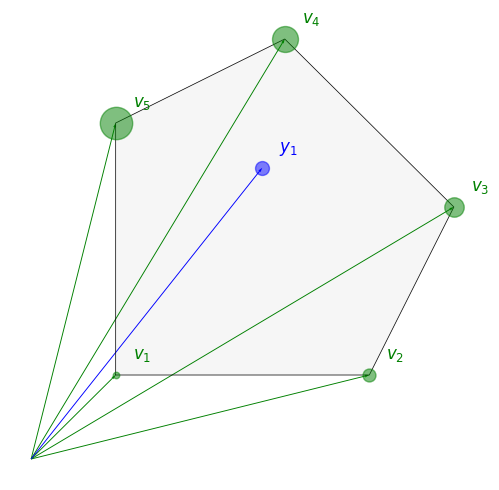

In [28]:
import matplotlib.pyplot as plt
import numpy as np

vertices = np.array([
    [1, 1],
    [4, 1],
    [5, 3],
    [3, 5],
    [1, 4]
])

weights = np.array([1, 2, 3, 4, 5])  # example weights

weights = weights / np.sum(weights)
weighted_barycenter = np.average(vertices, axis=0, weights=weights)


plt.figure(figsize=(6, 6))
polygon = np.vstack([vertices, vertices[0]])  # close the polygon loop

plt.plot(polygon[:, 0], polygon[:, 1], color= "black", linestyle= '-', lw=0.5)
plt.fill(polygon[:, 0], polygon[:, 1], color='lightgray', alpha=0.2)


for i, (x, y) in enumerate(vertices):
    plt.plot(x, y, 'o', color='green', alpha = 0.5, markersize = weights[i]*70)
    plt.quiver(0, 0, x, y, color="green", scale=1, width = 0.002, scale_units='xy', angles='xy')
    plt.text(x+0.2, y+0.2, f'$v_{i+1}$', color="green", fontsize=12, ha='left')

plt.plot(weighted_barycenter[0], weighted_barycenter[1], 'o', color='blue', alpha = 0.5, markersize=10)
plt.text(weighted_barycenter[0]+0.2, weighted_barycenter[1]+0.2, f'$y_{1}$', color="blue", fontsize=12, ha='left')
plt.quiver(0, 0, weighted_barycenter[0], weighted_barycenter[1], color="blue", scale=1, width = 0.002, scale_units='xy', angles='xy')





plt.axis('off')
plt.savefig("prova_baricentro.png", dpi = 300)

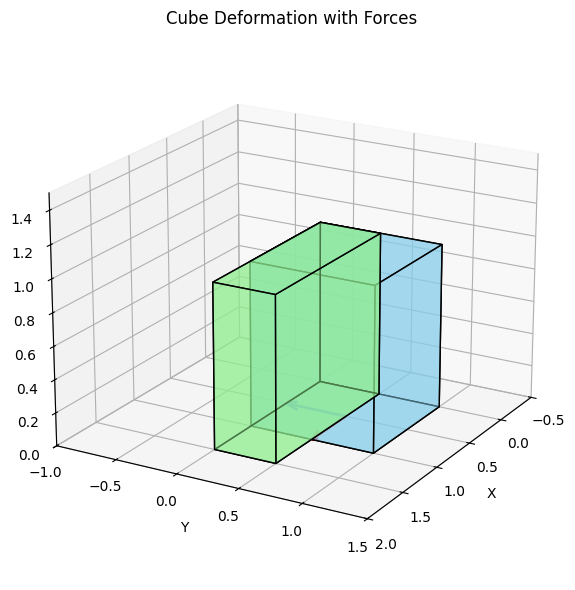

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def draw_cube(ax, origin, size=1, color='skyblue', alpha=0.5):
    # Create the 8 vertices of a cube
    ox, oy, oz = origin
    s = size
    vertices = np.array([
        [ox, oy, oz],
        [ox + s, oy, oz],
        [ox + s, oy + s, oz],
        [ox, oy + s, oz],
        [ox, oy, oz + s],
        [ox + s, oy, oz + s],
        [ox + s, oy + s, oz + s],
        [ox, oy + s, oz + s],
    ])
    # Define the 6 faces of the cube
    faces = [[vertices[j] for j in [0,1,2,3]],
             [vertices[j] for j in [4,5,6,7]], 
             [vertices[j] for j in [0,1,5,4]], 
             [vertices[j] for j in [2,3,7,6]],
             [vertices[j] for j in [1,2,6,5]],
             [vertices[j] for j in [4,7,3,0]]]

    ax.add_collection3d(Poly3DCollection(faces, facecolors=color, linewidths=1, edgecolors='k', alpha=alpha))

def draw_force_arrow(ax, start, vector, color='red'):
    ax.quiver(*start, *vector, color=color, arrow_length_ratio=0.2, linewidth=2)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Cube Deformation with Forces")

# Original cube
draw_cube(ax, origin=(0, 0, 0), size=1, color='skyblue', alpha=0.5)

# Transformed cube: stretched in x by 1.5, compressed in y by 0.5
transform = np.diag([1.5, 0.5, 1])  # Scale x, y, z
original_vertices = np.array([[0,0,0], [1,0,0], [1,1,0], [0,1,0],
                              [0,0,1], [1,0,1], [1,1,1], [0,1,1]])
transformed_vertices = original_vertices @ transform.T
# Faces
faces = [[transformed_vertices[j] for j in [0,1,2,3]],
         [transformed_vertices[j] for j in [4,5,6,7]], 
         [transformed_vertices[j] for j in [0,1,5,4]], 
         [transformed_vertices[j] for j in [2,3,7,6]],
         [transformed_vertices[j] for j in [1,2,6,5]],
         [transformed_vertices[j] for j in [4,7,3,0]]]
ax.add_collection3d(Poly3DCollection(faces, facecolors='lightgreen', linewidths=1, edgecolors='k', alpha=0.5))

# Draw "forces"
draw_force_arrow(ax, start=[0.5, 0.5, 0], vector=[0.5, 0, 0], color='red')  # x stretch
draw_force_arrow(ax, start=[0.5, 0.5, 0], vector=[0, -0.5, 0], color='blue') # y compression

# Set limits and labels
ax.set_xlim([-0.5, 2])
ax.set_ylim([-1, 1.5])
ax.set_zlim([0, 1.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20, azim=30)

plt.tight_layout()
plt.show()